In [1]:
import torch

# Lecture2.2: Creating Tensors with Gradients

- **Method 1: Create tensor with gradients**

It is very similar to creating a tensor, all you need to do is to add an additional argument.

In [2]:
a = torch.ones((2, 2), requires_grad=True)

- **Check if tensor requires gradients**

This should return `True` otherwise you've not done it right.

In [3]:
a.requires_grad

True

- **Method 2: Create tensor with gradients**

This allows you to create a tensor as usual then an additional line to allow it to accumulate gradients.

In [4]:
# Normal way of creating gradients
a = torch.ones(2, 2)

# Requires gradient
a.requires_grad_()

# Check if requires gradient
a.requires_grad

True

- **A tensor without gradients just for comparison**

If you do not do either of the methods above, you'll realize you will get False for checking for gradients.

In [5]:
# Not a variable
no_gradient = torch.ones(2, 2)

In [6]:
no_gradient.requires_grad

False

- **Tensor with gradients addition operation**

In [7]:
# Behaves similarly to tensors
b = torch.ones((2, 2), requires_grad=True)
print(a + b)
print(torch.add(a, b))

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


- **Tensor with gradients multiplication operation**

As usual, the operations we learnt previously for tensors apply for tensors with gradients. Feel free to try divisions, mean or standard deviation!

In [8]:
print(a * b)
print(torch.mul(a, b))

tensor([[1., 1.],
        [1., 1.]], grad_fn=<MulBackward0>)
tensor([[1., 1.],
        [1., 1.]], grad_fn=<MulBackward0>)


> **What exactly is `requires_grad`?**
>
> Allows calculation of gradients w.r.t. the tensor that all allows gradients accumulation

$$y_i = 5(x_i+1)^2$$

- **Create tensor of size 2x1 filled with 1's that requires gradient**

In [9]:
x = torch.ones(2, requires_grad=True)

In [10]:
x

tensor([1., 1.], requires_grad=True)

- **Simple linear equation with x tensor created**

$$y_i\bigr\rvert_{x_i=1} = 5(1 + 1)^2 = 5(2)^2 = 5(4) = 20$$

We should get a value of 20 by replicating this simple equation

In [11]:
y = 5 * (x + 1) ** 2

In [12]:
y

tensor([20., 20.], grad_fn=<MulBackward0>)

- **Simple equation with y tensor**

Backward should be called only on a scalar (i.e. 1-element tensor) or with gradient w.r.t. the variable

Let's reduce y to a scalar then...

$$o = \frac{1}{2}\sum_i y_i$$

As you can see above, we've a tensor filled with 20's, so average them would return 20

In [13]:
o = (1/2) * torch.sum(y)

In [14]:
o

tensor(20., grad_fn=<MulBackward0>)

- **Calculating first derivative**

**Recap `y` equation**: $y_i = 5(x_i+1)^2$
    
**Recap `o` equation**: $o = \frac{1}{2}\sum_i y_i$
    
**Substitute `y` into `o` equation**: $o = \frac{1}{2} \sum_i 5(x_i+1)^2$
    
$$\frac{\partial o}{\partial x_i} = \frac{1}{2}[10(x_i+1)]$$
    
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{1}{2}[10(1 + 1)] = \frac{10}{2}(2) = 10$$
    

We should expect to get 10, and it's so simple to do this with PyTorch with the following line...
    
Get first derivative:

In [15]:
o.backward()

Print out first derivative:

In [16]:
x.grad

tensor([10., 10.])

- **If x requires gradient and you create new objects with it, you get all gradients**

In [17]:
print(x.requires_grad)
print(y.requires_grad)
print(o.requires_grad)

True
True
True


- **Stop autograd from tracking history on Tensors**

You can also stop autograd from tracking history on Tensors with `.requires_grad=True` by wrapping the code block in `with torch.no_grad()`:

In [18]:
print(x.requires_grad)
print((x ** 2).requires_grad)

True
True


In [19]:
with torch.no_grad():
    print((x ** 2).requires_grad)

False


## Summary
We've learnt to...

- Tensor with Gradients
    - Wraps a tensor for gradient accumulation
- Gradients
    - Define original equation
    - Substitute equation with `x` values
    - Reduce to scalar output, `o` through `mean`
    - Calculate gradients with `o.backward()`
    - Then access gradients of the `x` tensor with `requires_grad` through `x.grad`

### *References*
[1] [DOI](https://zenodo.org/badge/139945544.svg)(https://zenodo.org/badge/latestdoi/139945544)

[2] https://github.com/mila-udem/welcome_tutorials/tree/master/pytorch

[3] https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

[4] https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot
from IPython.display import Image

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


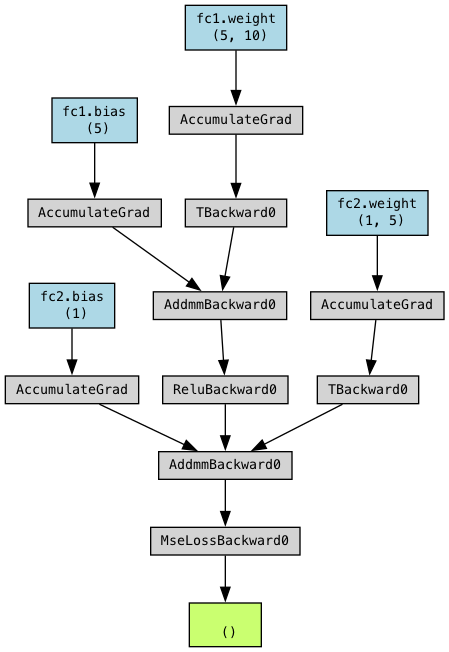

In [22]:

# Instantiate the model, define a loss function and an optimizer
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create a dummy input tensor
x = torch.randn(1, 10)
y = torch.randn(1, 1)

# Forward pass
output = model(x)
loss = criterion(output, y)

# Backward pass
optimizer.zero_grad()
loss.backward()

# Visualize the computational graph
graph = make_dot(loss, params=dict(model.named_parameters()))
graph.render("computational_graph", format="png")

# Display the graph in Jupyter Notebook
display(Image(filename="computational_graph.png"))